# Mushroom Classification Project Documentation

## Overview
This Jupyter notebook contains a complete deep learning project for classifying mushrooms as edible or poisonous. The system uses computer vision techniques with PyTorch and the ConvNeXt Small model from the timm library.

## Project Structure
The notebook is organized into the following sections:
1. **Package Installation**: Installing required dependencies including PyTorch, timm, and other libraries.
2. **Environment Setup**: Checking CUDA availability and Python executable.
3. **Dataset Exploration**: Loading and analyzing the mushroom dataset.
4. **Model Training**: Defining the dataset class, transforms, model architecture, and training loop.
5. **Visualization**: Displaying class distribution, sample images, confusion matrix, and classification report.

## Features
- Binary classification of mushrooms (edible vs poisonous)
- Pre-trained ConvNeXt Small model fine-tuning
- Data augmentation and balanced sampling
- Mixed precision training with CUDA acceleration
- Early stopping and best model saving
- Comprehensive evaluation metrics

## Dataset
- **Location**: `C:\Users\pawan\Downloads\Mushroom_Dataset\Mushroom_Dataset`
- **Classes**: edible, poisonous
- **Format**: Images in subfolders by class
- **Statistics**: 
  - Edible: 1181 images
  - Poisonous: 2220 images
  - Total: 3401 images

## Requirements
- Python 3.8+
- PyTorch with CUDA support
- Libraries: timm, pillow, numpy, matplotlib, seaborn, scikit-learn, tqdm

## Installation Instructions
Run the installation cells in the notebook to set up the environment:
- Install PyTorch with appropriate CUDA version
- Install additional packages via pip

## Training Configuration
- Image size: 224x224
- Batch size: 32
- Epochs: 20 (with early stopping)
- Learning rate: 1e-4
- Optimizer: AdamW with cosine annealing scheduler
- Data augmentation: random flip, rotation, color jitter

## Model Details
- Architecture: ConvNeXt Small (pre-trained on ImageNet)
- Output classes: 2
- Fine-tuning: All parameters trainable

## Results
After training, the notebook provides:
- Validation accuracy
- Confusion matrix visualization
- Classification report with precision, recall, F1-score

## Usage
1. Ensure dataset is in the correct path
2. Run cells sequentially from top to bottom
3. Monitor training progress with tqdm progress bars
4. View results in the evaluation cells

## Web Application
This project is part of a larger "Saran Project Website" which includes a Streamlit web interface for mushroom classification. Run `streamlit run app.py` to launch the web app.

## Notes
- The notebook uses GPU acceleration if available
- Training may take several minutes to hours depending on hardware
- Best model is saved as `best_convnext_model.pth`
- Adjust TRAIN_SPLIT variable to change train/validation ratio

## Troubleshooting
- If CUDA errors occur, ensure PyTorch is installed with correct CUDA version
- Check dataset path and file structure
- Reduce batch size if out of memory
- Use CPU if GPU not available (set DEVICE = "cpu")

In [1]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch


In [1]:
!pip install timm
!pip install torch
!pip install pillow
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tqdm
!pip install jupyter

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:

%pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu124
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import sys
sys.executable


'C:\\Users\\pawan\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\python.exe'

In [4]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\pawan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.cuda.get_device_name(0))


True
11.8
NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [6]:
import os

base_path = r"C:\Users\pawan\Downloads\Mushroom_Dataset\Mushroom_Dataset"

print("Folders inside base_path:")
print(os.listdir(base_path))

os.listdir(r"C:\Users\pawan\Downloads\Mushroom_Dataset\Mushroom_Dataset")

Folders inside base_path:
['edible', 'poisonous']


['edible', 'poisonous']

In [1]:
from glob import glob
import os

DATA_DIR = r"C:\Users\pawan\Downloads\Mushroom_Dataset\Mushroom_Dataset"

print("Folders:", os.listdir(DATA_DIR))
print("Edible count:", len(glob(DATA_DIR + "/edible/*")))
print("Poisonous count:", len(glob(DATA_DIR + "/poisonous/*")))
print("Total images:", len(glob(DATA_DIR + "/*/*")))

Folders: ['edible', 'poisonous']
Edible count: 1181
Poisonous count: 2220
Total images: 3401


In [1]:
import os
import random
import numpy as np
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset, WeightedRandomSampler
import torchvision.transforms as transforms
import timm

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================================
# CONFIG
# ================================================================
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20
LR = 1e-4

DATA_DIR = r"C:\Users\pawan\Downloads\Mushroom_Dataset\Mushroom_Dataset" 
print("Using device:", DEVICE)

# Seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if DEVICE == "cuda":
    torch.cuda.manual_seed_all(42)

# ================================================================
# DATASET CLASS
# ================================================================
class MushroomDataset(Dataset):
    def __init__(self, root, transform=None):
        self.transform = transform
        self.samples = []

        self.class_to_idx = {
            "edible": 0,
            "poisonous": 1
        }

        for class_name, label in self.class_to_idx.items():
            folder = os.path.join(root, class_name)
            if not os.path.exists(folder):
                print("Folder missing:", folder)
                continue

            for f in os.listdir(folder):
                path = os.path.join(folder, f)
                if os.path.isfile(path):
                    self.samples.append((path, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = Image.open(path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

# ================================================================
# TRANSFORMS
# ================================================================
train_tf = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.3, contrast=0.3),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

test_tf = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# ================================================================
# LOAD FULL DATASET
# ================================================================
full_train_ds = MushroomDataset(DATA_DIR, transform=train_tf)
full_val_ds   = MushroomDataset(DATA_DIR, transform=test_tf)

N = len(full_train_ds)
indices = list(range(N))
random.shuffle(indices)

# CHANGE THIS VALUE (0.7 = 70% train, 30% validation)
TRAIN_SPLIT = 0.7

train_size = int(TRAIN_SPLIT * N)
train_idx = indices[:train_size]
val_idx   = indices[train_size:]

train_ds = Subset(full_train_ds, train_idx)
val_ds   = Subset(full_val_ds, val_idx)

print(f"Train size: {len(train_ds)} | Val size: {len(val_ds)}")

# ================================================================
# BUILD BALANCED SAMPLER (ONLY FOR TRAIN)
# ================================================================
train_labels = [full_train_ds.samples[i][1] for i in train_idx]
class_counts = np.bincount(train_labels)
weights = 1.0 / (class_counts + 1e-8)
sample_weights = [weights[label] for label in train_labels]

sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# ================================================================
# DATALOADERS
# ================================================================
pin_memory = True if DEVICE == "cuda" else False
num_workers = 0  # windows safe

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE,
                          sampler=sampler, num_workers=num_workers, pin_memory=pin_memory)

val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE,
                        shuffle=False, num_workers=num_workers, pin_memory=pin_memory)

# ================================================================
# MODEL - ConvNeXt Small
# ================================================================
model = timm.create_model("convnext_small", pretrained=True, num_classes=2)
model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

use_amp = DEVICE == "cuda"
scaler = torch.cuda.amp.GradScaler() if use_amp else None

for p in model.parameters():
    p.requires_grad = True

# ================================================================
# TRAINING LOOP
# ================================================================
best_acc = 0
patience = 5
wait = 0

for epoch in range(EPOCHS):

    model.train()
    running_loss = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")

    for imgs, labels in loop:
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()

        with torch.cuda.amp.autocast(enabled=use_amp):
            outputs = model(imgs)
            loss = criterion(outputs, labels)

        if use_amp:
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            optimizer.step()

        running_loss += loss.item()

    scheduler.step()

    # ================= Validation =================
    model.eval()
    preds, trues = [], []

    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs = imgs.to(DEVICE)
            outputs = model(imgs)
            pred = outputs.argmax(1).cpu().numpy()

            preds.extend(pred)
            trues.extend(labels.numpy())

    acc = accuracy_score(trues, preds)
    print(f"Validation Accuracy: {acc*100:.2f}%")

    # Save best model
    if acc > best_acc:
        best_acc = acc
        wait = 0
        torch.save(model.state_dict(), "best_convnext_model.pth")
        print("✓ Model improved → saved.")
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered.")
            break

print("\n======================================================")
print(f"BEST FINAL ACCURACY = {best_acc*100:.2f}%")
print("======================================================")

Using device: cuda
Train size: 2380 | Val size: 1021


C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:143: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if use_amp else None
Epoch 1/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 1/20: 100%|██████████| 75/75 [00:50<00:00,  1.48it/s]


Validation Accuracy: 81.49%
✓ Model improved → saved.


Epoch 2/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 2/20: 100%|██████████| 75/75 [00:45<00:00,  1.65it/s]


Validation Accuracy: 85.11%
✓ Model improved → saved.


Epoch 3/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 3/20: 100%|██████████| 75/75 [00:38<00:00,  1.96it/s]


Validation Accuracy: 82.66%


Epoch 4/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 4/20: 100%|██████████| 75/75 [00:38<00:00,  1.94it/s]


Validation Accuracy: 85.31%
✓ Model improved → saved.


Epoch 5/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 5/20: 100%|██████████| 75/75 [00:42<00:00,  1.77it/s]


Validation Accuracy: 86.58%
✓ Model improved → saved.


Epoch 6/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 6/20: 100%|██████████| 75/75 [00:37<00:00,  2.02it/s]


Validation Accuracy: 85.60%


Epoch 7/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 7/20: 100%|██████████| 75/75 [00:38<00:00,  1.93it/s]


Validation Accuracy: 86.58%


Epoch 8/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 8/20: 100%|██████████| 75/75 [00:39<00:00,  1.91it/s]


Validation Accuracy: 89.32%
✓ Model improved → saved.


Epoch 9/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 9/20: 100%|██████████| 75/75 [00:37<00:00,  2.00it/s]


Validation Accuracy: 88.34%


Epoch 10/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 10/20: 100%|██████████| 75/75 [03:58<00:00,  3.18s/it]  


Validation Accuracy: 85.11%


Epoch 11/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 11/20: 100%|██████████| 75/75 [00:41<00:00,  1.82it/s]


Validation Accuracy: 89.42%
✓ Model improved → saved.


Epoch 12/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 12/20: 100%|██████████| 75/75 [00:47<00:00,  1.57it/s]


Validation Accuracy: 89.42%


Epoch 13/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 13/20: 100%|██████████| 75/75 [00:45<00:00,  1.65it/s]


Validation Accuracy: 89.62%
✓ Model improved → saved.


Epoch 14/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 14/20: 100%|██████████| 75/75 [00:41<00:00,  1.81it/s]


Validation Accuracy: 88.54%


Epoch 15/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 15/20: 100%|██████████| 75/75 [00:40<00:00,  1.84it/s]


Validation Accuracy: 89.91%
✓ Model improved → saved.


Epoch 16/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 16/20: 100%|██████████| 75/75 [00:37<00:00,  1.99it/s]


Validation Accuracy: 90.01%
✓ Model improved → saved.


Epoch 17/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 17/20: 100%|██████████| 75/75 [00:38<00:00,  1.95it/s]


Validation Accuracy: 90.01%


Epoch 18/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 18/20: 100%|██████████| 75/75 [00:39<00:00,  1.91it/s]


Validation Accuracy: 90.11%
✓ Model improved → saved.


Epoch 19/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 19/20: 100%|██████████| 75/75 [00:44<00:00,  1.70it/s]


Validation Accuracy: 90.11%


Epoch 20/20:   0%|          | 0/75 [00:00<?, ?it/s]C:\Users\pawan\AppData\Local\Temp\ipykernel_4324\3366890950.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 20/20: 100%|██████████| 75/75 [00:38<00:00,  1.93it/s]


Validation Accuracy: 90.11%

BEST FINAL ACCURACY = 90.11%


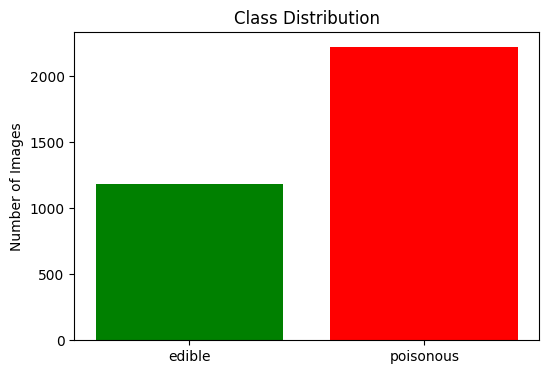

In [9]:
import os
import matplotlib.pyplot as plt

classes = ["edible", "poisonous"]
counts = [len(os.listdir(os.path.join(DATA_DIR, cls))) for cls in classes]

plt.figure(figsize=(6,4))
plt.bar(classes, counts, color=['green', 'red'])
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

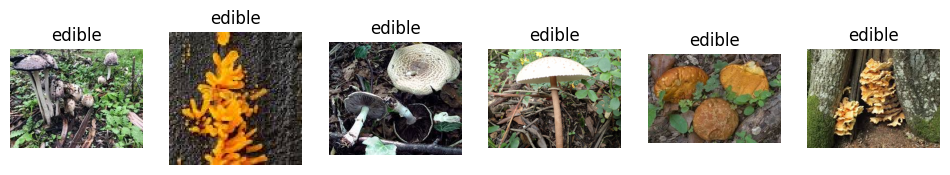

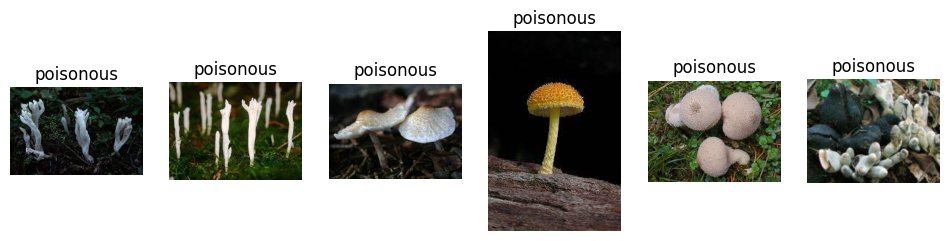

In [10]:
import random
from PIL import Image

def show_samples(class_name, n=6):
    folder = os.path.join(DATA_DIR, class_name)
    files = random.sample(os.listdir(folder), n)

    plt.figure(figsize=(12, 4))
    for i, f in enumerate(files):
        img = Image.open(os.path.join(folder, f))

        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)

    plt.show()

show_samples("edible", 6)
show_samples("poisonous", 6)

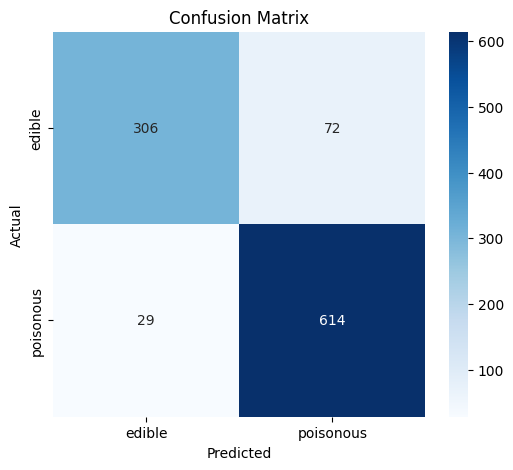

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(trues, preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["edible","poisonous"],
            yticklabels=["edible","poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
from sklearn.metrics import classification_report

print(classification_report(trues, preds,
                            target_names=["edible", "poisonous"]))


              precision    recall  f1-score   support

      edible       0.91      0.81      0.86       378
   poisonous       0.90      0.95      0.92       643

    accuracy                           0.90      1021
   macro avg       0.90      0.88      0.89      1021
weighted avg       0.90      0.90      0.90      1021

